In [8]:
import os.path

import pandas as pd
from chem_render import draw_reaction
from ord_data_load import ORD_PATH, ORD_REPO_PATH

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%%time
all_reactions = pd.read_pickle(f'{ORD_PATH}/all_reactions.pkl')

CPU times: total: 15.4 s
Wall time: 15.4 s


In [10]:
# all Palladium containing reactions as catalyst
pd_cat = all_reactions.reaction_smile.str.contains('Pd').fillna(False)
pd_cat.sum()

147979

In [11]:
# containing palladium/Pd keyword in notes
pd_notes = all_reactions.notes.str.contains(r'Pd|[Pp]all?ad').fillna(False)
pd_notes.sum()

155574

In [12]:
# what are preceding chars (for future tokenization)
pre = all_reactions.notes.str.extract(r'(.)(?=[Pp]allad)')[0]
pre

id
ord-56b1f4bfeebc4b8ab990b9804e798aa7      i
ord-1169cbe9fa064a879ac34b2e524a4e69      i
ord-13992005c22d4673aa802b5e140076e8      i
ord-a36b48917c9942d1a34637511773ee1f      i
ord-5fc624fd97b7430eafbe8dcc049d170b       
                                       ... 
ord-8fa3fc051e7f496593d7c7ba2a3aa564    NaN
ord-efddf5d225dc462db60c67a0306a9460    NaN
ord-dc172fbdf10e4ae893a012785f609af2    NaN
ord-d1adc6bb76454fb9b0b4a2f30a493858    NaN
ord-2b0f97b346414e2083183fb1d64385e2    NaN
Name: 0, Length: 1790148, dtype: object

In [13]:
pre_unique = pre.dropna().value_counts()
pre_unique

     53517
)    23229
i     6236
o     3588
-     2985
]     1449
e      888
y      318
(       73
l       72
n       37
s       36
/       18
}        9
—        4
,        3
r        3
[        3
0        1
.        1
"        1
%        1
_        1
Name: 0, dtype: int64

#### 'o' ####


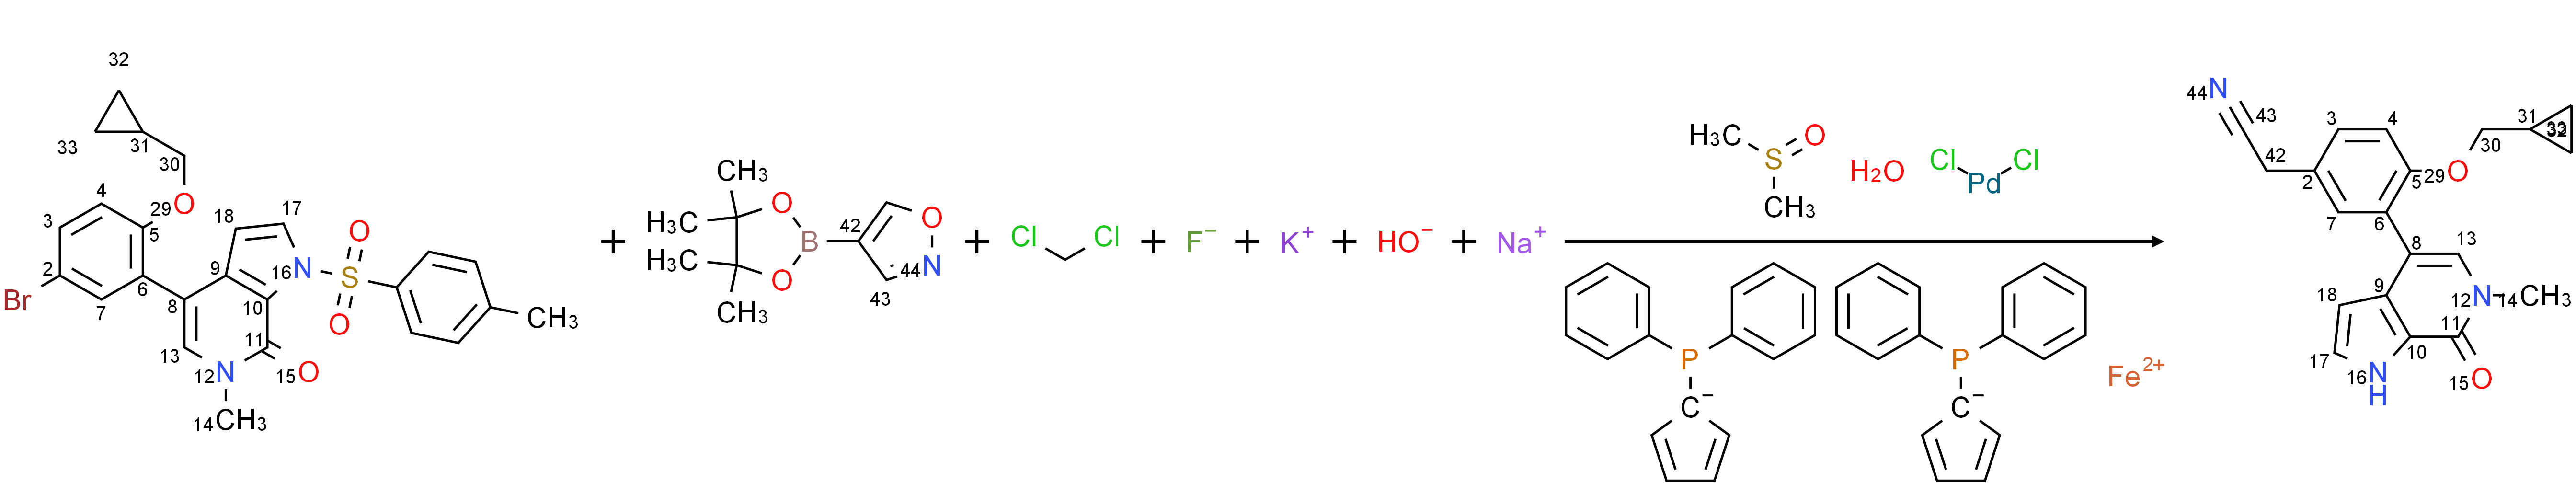

Patent:       US09296741B2
Reaction_id:  ord-0197634d65ae4034ae1c61c785f5bdb1
A mixture of Example 314b (100 mg, 0.190 mmol), 4-(4,4,5,5-tetramethyl-1,3,2-dioxaborolan-2-yl)isoxazole (44.4 mg, 0.228 mmol), [1,1′-bis(diphenylphosphino)ferrocene]-dichloropalladium (II), complex with dichloromethane (1:1) (15.5 mg, 0.019 mmol), and potassium fluoride (44.1 mg, 0.758 mmol) in dimethylsulfoxide (1.9 mL) and water (0.75 mL) was purged with nitrogen gas and heated under microwave conditions at 130° C. at for 1.5 hours. The mixture was then treated with 1 mL 4N NaOH and stirred at ambient temperature for 2 hours. The reaction mixture was partitioned between water and ethyl acetate, and the aqueous layers was extracted with ethyl acetate. The combined organic phases were washed with water (2×), saturated aqueous sodium chloride, dried over anhydrous magnesium sulfate, and filtered. The filtrate was concentrated and the residue was purified by flash chromatography (silica gel, 0-8% methanol/dich

In [22]:
%%time
pre_char = pre_unique.index.values[3]
print(f"#### '{pre_char}' ####")
draw_reaction(all_reactions[pre == pre_char].sample(), highlight_text='allad')

In [23]:
# Single letter regex mistake
s = 'alladium'
regex_pattern = ''
for i in range(len(s)):
    print(s[:i] + f'[^{s[i]}]' + s[i+1:])
    regex_pattern += s[:i] + f'[^{s[i]}]' + s[i+1:] + '|'
regex_pattern = regex_pattern[:-1]
regex_pattern

[^a]lladium
a[^l]ladium
al[^l]adium
all[^a]dium
alla[^d]ium
allad[^i]um
alladi[^u]m
alladiu[^m]


'[^a]lladium|a[^l]ladium|al[^l]adium|all[^a]dium|alla[^d]ium|allad[^i]um|alladi[^u]m|alladiu[^m]'

In [24]:
%%time
pd_mistakes = all_reactions.notes.str.contains(f'{regex_pattern}').fillna(False)
pd_mistakes.sum()

CPU times: total: 38.9 s
Wall time: 38.9 s


75

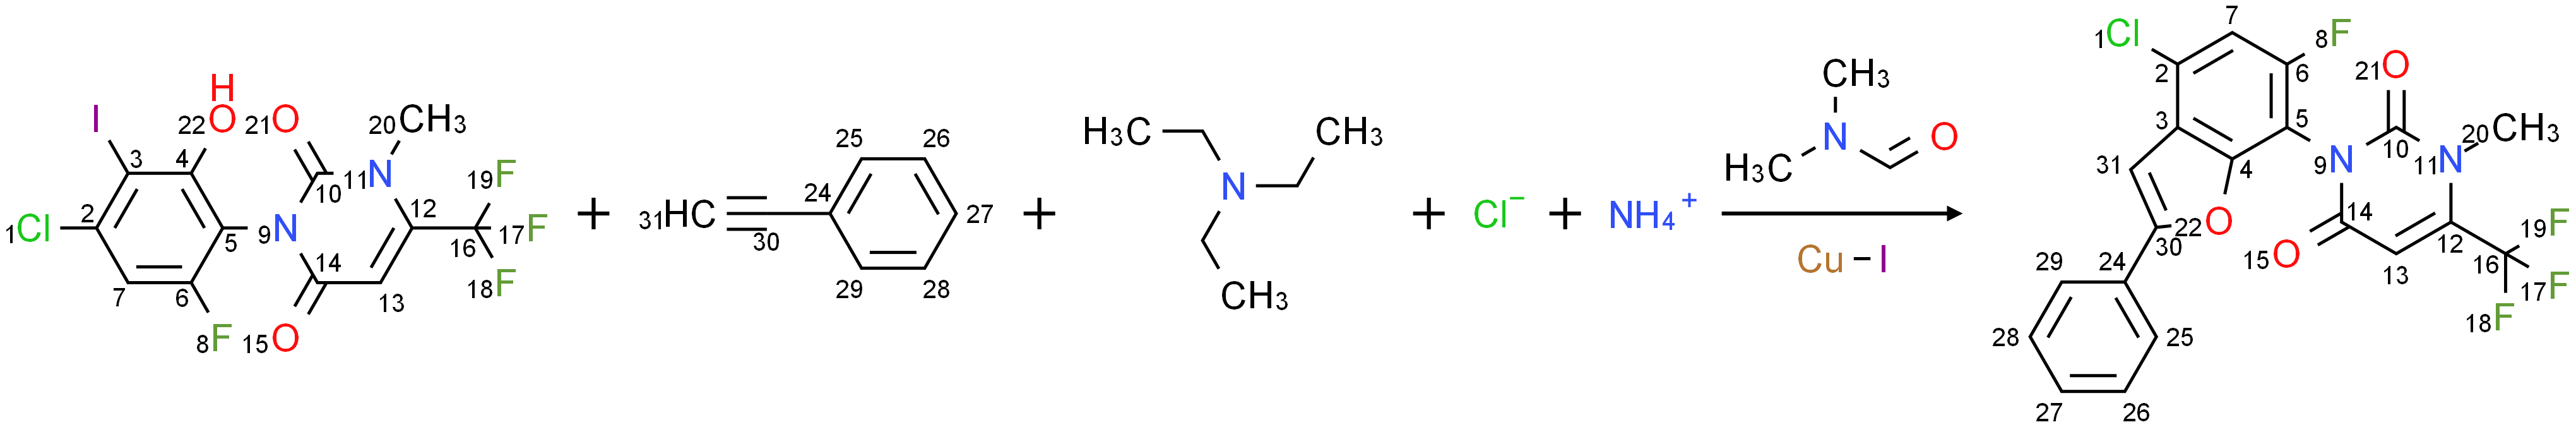

Patent:       US06077812
Reaction_id:  ord-a485364eb3e8481b9f0a3c7d855917c3
Under a nitrogen atmosphere, a solution of 1.5 grams (0.003 mole) of 3-(4-chloro-6-fluoro-2-hydroxy-3-iodophenyl)-1-methyl-6-trifluoromethyl-2,4(1H,3H)-pyrimidinedione, 0.41 gram (0.004 mole) of phenylacetylene, and 0.71 gram (0.007 mole) of triethylamine in 25 mL of DMF was stirred. To this was added 0.09 gram (0.00013 mole) of dichlorobis(triphenylphosphine)pallidium (II) and 0.05 gram (0.00026 mole) of copper (I) iodide. Upon completion of addition, the reaction mixture was heated to 70° C. where it stirred for 2.5 hours. After this time, the reaction mixture was cooled to ambient temperature and then poured into 150 mL of an aqueous 10% ammonium chloride solution. The resulting precipitate was collected by filtration and washed with water. The precipitate was taken up in 120 mL of ethyl acetate. The resulting solution was dried with sodium sulfate and filtered. The filtrate was concentrated under reduced pr

In [27]:
draw_reaction(all_reactions[pd_mistakes & ~pd_cat].sample(), highlight_text='dium')

In [47]:
pd_mask = pd_cat | pd_notes | pd_mistakes
pd_df = all_reactions[pd_mask]
pd_mask
# len(pd_df)

id
ord-56b1f4bfeebc4b8ab990b9804e798aa7     True
ord-1169cbe9fa064a879ac34b2e524a4e69     True
ord-13992005c22d4673aa802b5e140076e8     True
ord-a36b48917c9942d1a34637511773ee1f     True
ord-5fc624fd97b7430eafbe8dcc049d170b     True
                                        ...  
ord-8fa3fc051e7f496593d7c7ba2a3aa564    False
ord-efddf5d225dc462db60c67a0306a9460    False
ord-dc172fbdf10e4ae893a012785f609af2    False
ord-d1adc6bb76454fb9b0b4a2f30a493858    False
ord-2b0f97b346414e2083183fb1d64385e2    False
Length: 1790148, dtype: bool

In [80]:
# benchmark compressions
from time import time
import os

compressions = ['', '.gz', '.bz2', '.zip', '.zst', '.tar', '.tar.gz', '.tar.bz2']

for compresssion in compressions:
    start = time()
    filename = f'{ORD_PATH}/pd_mask.csv{compresssion}'
    pd_mask.to_csv(filename)
    print(f"{compresssion:10s}: {time() - start:5.1f}s {os.path.getsize(filename)//1024//1024:5d}MB")
    os.remove(filename)

          :   2.0s    74MB
.gz       :   6.9s    34MB
.bz2      :   7.4s    29MB
.zip      :   5.7s    34MB
.zst      :   2.7s    31MB
.tar      :   3.0s    74MB
.tar.gz   :   7.7s    34MB
.tar.bz2  :   8.4s    29MB


In [81]:
# save
pd_mask.to_csv(f'{ORD_PATH}/pd_mask.csv.zst')

In [82]:
pd_mask = pd.read_csv(f'{ORD_PATH}/pd_mask.csv.zst', index_col="id").squeeze()
pd_mask

id
ord-56b1f4bfeebc4b8ab990b9804e798aa7     True
ord-1169cbe9fa064a879ac34b2e524a4e69     True
ord-13992005c22d4673aa802b5e140076e8     True
ord-a36b48917c9942d1a34637511773ee1f     True
ord-5fc624fd97b7430eafbe8dcc049d170b     True
                                        ...  
ord-8fa3fc051e7f496593d7c7ba2a3aa564    False
ord-efddf5d225dc462db60c67a0306a9460    False
ord-dc172fbdf10e4ae893a012785f609af2    False
ord-d1adc6bb76454fb9b0b4a2f30a493858    False
ord-2b0f97b346414e2083183fb1d64385e2    False
Name: 0, Length: 1790148, dtype: bool

In [83]:
all_reactions[pd_mask]

,reaction_smile,solvents,reactants,catalysts,reagents,temperature,time,product,yield,notes,patent,original_dataset
id,,,,,,,,,,,,
ord-56b1f4bfeebc4b8ab990b9804e798aa7,CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=C(C=C(C=C3)F)F)C...,[],"[[None, CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=C(C=C(C=...","[[None, C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=C(C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",110.0,None,CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=C(C=C(C=C3)F)F)C...,65.39,"To a solution of ethyl 6-bromo-4-(2,4-difluoro...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
ord-1169cbe9fa064a879ac34b2e524a4e69,CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC.C1=CC=C(C=C1)I...,"[[None, COC1=CC=CC=C1]]","[[None, CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC], [Non...","[[None, CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",100.0,None,CN1C=NC2=C1C=C(C(=C2F)NC3=CC=CC=C3)C(=O)OC,57.47,"9,9-Dimethyl-4,5-bis(diphenylphosphino)xanthen...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
ord-13992005c22d4673aa802b5e140076e8,CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC.C1=CC=C(C=C1)I...,"[[None, COC1=CC=CC=C1]]","[[None, CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC], [Non...","[[None, CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",100.0,None,CN1C=NC2=C1C=C(C(=C2F)NC3=CC=CC=C3)C(=O)OC,65.43,"9,9-Dimethyl-4,5-bis(diphenylphosphino)xanthen...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
ord-a36b48917c9942d1a34637511773ee1f,CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC.C1=CC=C(C=C1)I...,"[[None, COC1=CC=CC=C1]]","[[None, CN1C=NC2=C1C=C(C(=C2F)N)C(=O)OC], [Non...","[[None, CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",100.0,None,CN1C=NC2=C1C=C(C(=C2F)NC3=CC=CC=C3)C(=O)OC,75.07,"9,9-Dimethyl-4,5-bis(diphenylphosphino)xanthen...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
ord-5fc624fd97b7430eafbe8dcc049d170b,CC1=NC(=C(C=C1)OC2=CC(=NC=C2)Cl)C.C1=CC(=CC=C1...,"[[None, CC(=O)N(C)C]]","[[None, CC1=NC(=C(C=C1)OC2=CC(=NC=C2)Cl)C], [N...","[[None, CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=...","[[None, C(=O)([O-])[O-].[Cs+].[Cs+]]]",150.0,None,CC1=NC(=C(C=C1)OC2=CC(=NC=C2)NC3=CC=C(C=C3)S(=...,46.32,"3-(2-chloropyridin-4-yloxy)-2,6-dimethylpyrid...",None,ord_dataset-00005539a1e04c809a9a78647bea649c
...,...,...,...,...,...,...,...,...,...,...,...,...
ord-424d602ee6b34dcab5e37c9aa19aab48,[CH3:1][O:2][C:3]([C:5]1[C@@H:6]2[N:21]([C:22]...,"[[EtOAc, CCOC(=O)C], [DME, COCCOC], [Na2CO3, C...","[[N2, N#N], [(rac.)-(1R*,5S*)-7-Trifluorometha...","[[Pd(PPh3)4, C=1C=CC(=CC1)[P](C=2C=CC=CC2)(C=3...",[],80.0,1.0,COC(=O)C=1[C@H]2CN(C[C@@H](CC1C=1C=NC(=CC1)OCC...,73.0,"(rac.)-(1R*,5S*)-7-Trifluoromethanesulfonyloxy...",US07968720B2,ord_dataset-ffbef48837674f39816de887b5dc8bae
ord-1c3a25d845d74cada492ad511f4ffac6,Br[C:2]1[CH:3]=[CH:4][C:5]([N:8]2[CH2:12][CH2:...,"[[THF, C1CCOC1], [THF, C1CCOC1]]","[[NH4Cl, [NH4+].[Cl-]], [4-trifluoromethanesul...","[[Pd(PPh3)4, C=1C=CC(=CC1)[P](C=2C=CC=CC2)(C=3...",[],-78.0,30.0,COC(=O)C=1CN(CCC1C=1C=NC(=CC1)N1C[C@H](CC1)OC1...,52.0,"A sol. of (S)-5-bromo-2-[3-(2,6-dichloro-4-met...",US07968720B2,ord_dataset-ffbef48837674f39816de887b5dc8bae
ord-7e9dca83f617441ea03c8f72561a3acb,[CH2:1]([O:3][C:4]([C:6]1[CH2:7][N:8]([C:20]([...,"[[EtOAc, CCOC(=O)C], [DME, COCCOC]]","[[N2, N#N], [Na2CO3, C(=O)([O-])[O-].[Na+].[Na...","[[Pd(PPh3)4, C=1C=CC(=CC1)[P](C=2C=CC=CC2)(C=3...",[],80.0,1.0,C(C)OC(=O)C=1CN(CCC1C=1C=NC(=CC1)OCC1=CC(=NO1)...,62.0,"Compound A2 (9.52 g, 23.6 mmol) and 2-[3-(2-ch...",US07968720B2,ord_dataset-ffbef48837674f39816de887b5dc8bae
